# Basic Analysis

## Data Loading

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data_final.csv")
df.head()
len(df)

labels = df["label"].tolist()
labels[:10]

documents = df['project'].tolist()
corpus = " ".join(documents).lower()

In [ ]:
corpus[:1000]


" a study to analyze steel cast limited, a forging companys performance in comparison with its peers. used fundamental analysis of financial statements and calculated relevant financial ratios to evaluate companys status. calculated liquidity, financing and performance ratios and compared with the best performer in the sector, bharat forge limited.' - accounting for reasons for wastage of water in farm and conceiveing them to features.- developing models which could predict total cost and total returns for different types of crops.- fabricating and combining roles of modern machines in output of the crop with neural networks.- estimating weightage of amount of water on final produce with help of simple regression techniques.- reconciling the existing data for better visualisation on the website.' - achieved 99% accuracy with ~4k & 2k parameters (used keras)- max accuracy >99.8%'  achieved a very high psnr, currently drafting paperforthe results and algorithm. reconstruction in k-space 

## Data cleaning

In [ ]:
import string

def clean_text(corpus):
    # Remove punctuations from the corpus
    translator = str.maketrans('', '', string.punctuation)
    corpus = corpus.translate(translator)

    # Remove digits from the corpus
    remove_digits = str.maketrans('', '', string.digits)
    corpus = corpus.translate(remove_digits)
    return corpus

corpus = clean_text(corpus=corpus)
corpus[:1000]

' a study to analyze steel cast limited a forging companys performance in comparison with its peers used fundamental analysis of financial statements and calculated relevant financial ratios to evaluate companys status calculated liquidity financing and performance ratios and compared with the best performer in the sector bharat forge limited  accounting for reasons for wastage of water in farm and conceiveing them to features developing models which could predict total cost and total returns for different types of crops fabricating and combining roles of modern machines in output of the crop with neural networks estimating weightage of amount of water on final produce with help of simple regression techniques reconciling the existing data for better visualisation on the website  achieved  accuracy with k  k parameters used keras max accuracy   achieved a very high psnr currently drafting paperforthe results and algorithm reconstruction in kspace itself no superresolution of images thi

We can observe the changes

In [ ]:
corpus[:1000]

' a study to analyze steel cast limited a forging companys performance in comparison with its peers used fundamental analysis of financial statements and calculated relevant financial ratios to evaluate companys status calculated liquidity financing and performance ratios and compared with the best performer in the sector bharat forge limited  accounting for reasons for wastage of water in farm and conceiveing them to features developing models which could predict total cost and total returns for different types of crops fabricating and combining roles of modern machines in output of the crop with neural networks estimating weightage of amount of water on final produce with help of simple regression techniques reconciling the existing data for better visualisation on the website  achieved  accuracy with k  k parameters used keras max accuracy   achieved a very high psnr currently drafting paperforthe results and algorithm reconstruction in kspace itself no superresolution of images thi

## Data Analysis


In [ ]:


import spacy
nlp = spacy.load('en_core_web_sm')



In [ ]:
# Finding size ofnlp.max_length_length w.r.t max_length of spacy model
len(corpus) / nlp.max_length

0.210041

In [ ]:
# Spliting corpus to match the max length of spacy
corpus_chunk = [corpus[i:i+nlp.max_length] for i in range (0,len(corpus), nlp.max_length)]
    

We know parse each chunk of corpus with spacy

In [ ]:
docs = []
for chunk in corpus_chunk:
    doc = nlp(chunk)
    docs.append(doc)

Using the parsed data we can now find nouns, verbs , organizations and people from our text corpus

In [ ]:
words = []
nouns = []
verbs = []
people = []
orgs = []

In [ ]:
# Finding words, verbs and nouns
for doc in docs:
    for token in doc:
        words.append(token.text)
        if token.pos_ == "VERB":
            verbs.append(token.text)
            
        if token.pos_ == "NOUN":
            nouns.append(token.text)
        


In [ ]:
# Finding organizations and people
for doc in docs:
    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent.text)
        if ent.label_ == "PERSON":
            people.append(ent.text)

In [ ]:
print("Total words: ", len(words))
print("Total verbs: ", len(verbs))
print("Total nouns: ", len(nouns))
print("Total people: ", len(people))
print("Total organizations: ", len(orgs))

Total words:  32440
Total verbs:  5025
Total nouns:  10461
Total people:  135
Total organizations:  387


We will now find the frequency of words 

In [ ]:
from collections import Counter
from collections import OrderedDict

def sort_by_frequency(data,reverse = True):
    """ 
    Function to sord the data by its frequency
    Returns ordered dictionary
    Default: Sort in descending order
        
    """
    data_with_freq = dict(Counter(data))
    data_sorted_by_freq = OrderedDict(sorted(data_with_freq.items(), key=lambda x: x[1],reverse=reverse))
    
    return data_sorted_by_freq





Sorting the words based on frequency

In [ ]:
words_frequency = sort_by_frequency(words)
nouns_frequency = sort_by_frequency(nouns)
verbs_frequency  = sort_by_frequency(verbs)
people_frequency = sort_by_frequency(people)
orgs_frequency = sort_by_frequency(orgs)

We can observe that stop words like "the", "of","to","a","in" etc occurs most often in our corpus . 

In [ ]:
words_frequency

OrderedDict([('the', 1568),
             ('of', 1091),
             ('and', 1079),
             ('to', 951),
             ('a', 811),
             ('in', 523),
             ('for', 514),
             (' ', 513),
             ('using', 391),
             ('on', 380),
             ('is', 309),
             ('data', 263),
             ('with', 246),
             ('model', 219),
             ('an', 213),
             ('used', 204),
             ('this', 203),
             ('from', 196),
             ('as', 180),
             ('project', 177),
             ('was', 165),
             ('which', 143),
             ('that', 140),
             ('by', 138),
             ('it', 127),
             ('based', 123),
             ('learning', 115),
             ('are', 104),
             ('implemented', 101),
             ('developed', 97),
             ('system', 94),
             ('image', 92),
             ('we', 90),
             ('i', 88),
             ('different', 87),
             ('can', 85),


# N-gram analysis

We will use nltk to find bigrams of our corpus

In [ ]:
import nltk

def create_bigram(tokens):
    # Using words token generated from spacy to find bigram
    bigrams_ = nltk.bigrams(tokens)
    # Convert generator into list of tuples of bigram 
    return list(bigrams_)

In [ ]:
bigrams_list = create_bigram(words)
bigrams = [" ".join(bigram) for bigram in list(bigrams_list)]

In [ ]:
bigrams[:10]

['  a',
 'a study',
 'study to',
 'to analyze',
 'analyze steel',
 'steel cast',
 'cast limited',
 'limited a',
 'a forging',
 'forging companys']

In [ ]:
# Sorting bigram by frequency
bigram_frequency = sort_by_frequency(bigrams)


We can observe bigram_frequency 

In [ ]:
def get_top_n_from_order_dict(ordered_dict,n):
    """ Function to find n top object from ordered dictionary"""
    return [list(ordered_dict.items())[i] for i in range(n)]

In [ ]:
# Finding top 25 bigram
top_bigram = get_top_n_from_order_dict(bigram_frequency,25)
top_bigram

[('of the', 165),
 ('in the', 92),
 ('on the', 86),
 ('this project', 82),
 ('based on', 74),
 ('of  ', 59),
 ('for the', 58),
 ('of a', 52),
 ('such as', 47),
 ('is a', 47),
 ('with the', 45),
 ('deep learning', 44),
 ('neural network', 43),
 ('to predict', 42),
 ('to the', 42),
 ('machine learning', 41),
 ('and the', 40),
 ('on a', 37),
 ('part of', 37),
 ('developed a', 36),
 ('the project', 35),
 ('in a', 34),
 ('can be', 34),
 ('is to', 33),
 ('from the', 33)]

We can visualize the top bigram as barplots in following way

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_list_of_tuple(data):
    """"""
    list1, list2 = zip(*data)
    y_pos = np.arange(len(list1))
    plt.barh(y_pos, list2, align='center', alpha=0.5)
    plt.yticks(y_pos, list1)
    plt.show()

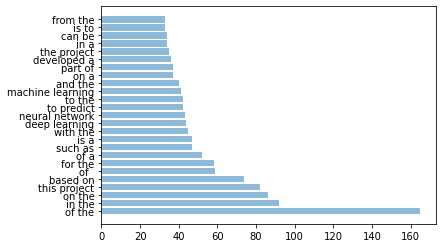

In [ ]:
visualize_list_of_tuple(top_bigram)

Finding unique nouns, verbs, people name and organization name in our text corpus

In [ ]:
unique_nouns = set(nouns)
unique_verbs = set(verbs)
unique_people = set(people)
unique_orgs = set(orgs)            


In [ ]:
unique_orgs

{'ai',
 'ajax php',
 'algorithm',
 'amazon',
 'analysisliaison diagram',
 'android',
 'android animations',
 'android development',
 'android devices',
 'android google maps',
 'android php mysql',
 'android studio java',
 'android wearable development',
 'ann',
 'anova',
 'apache mysql php',
 'app',
 'aum',
 'availabe',
 'avr microcontroller motors',
 'aws',
 'bayesian structural',
 'bleu',
 'btech final',
 'bureau of labor',
 'cctv',
 'center for computational brain research ccbr massachusetts institute of technology mit',
 'churn',
 'ci',
 'cnn',
 'columbia asia',
 'conceptsfront end',
 'cornell universitys movie dialogue',
 'coursera',
 'cpg',
 'dc motor',
 'deepspeech',
 'digital',
 'distributionof',
 'dl',
 'dod',
 'downloadi',
 'dylan clendenin',
 'ecg',
 'ecg signal',
 'enron',
 'epcc',
 'epl',
 'erp',
 'etl',
 'extrapolating lidar',
 'fcfs',
 'fest college program pslbm',
 'firstever simspark',
 'flexor',
 'github',
 'glassdoorcom',
 'google',
 'govt',
 'graphs ps subsidy inc 

In [ ]:
unique_people

{'accelerometer arduino nano',
 'ai hackathon',
 'aims kochi',
 'alex grave',
 'android app',
 'android nano degree',
 'android nano degree xyz reader',
 'ann',
 'app github',
 'applicationmy role',
 'arduino',
 'arima modelling',
 'aws google',
 'bert',
 'bert kaggle',
 'bert model',
 'blogs youtube',
 'chen',
 'cluster ids',
 'competitionhttpsstanfordmlgroupgithubiocompetitionschexpert',
 'cristiano ronaldo',
 'css javascript google cse',
 'db php javascript',
 'diwali',
 'feedbacks',
 'gauss seidel',
 'glove',
 'gram',
 'graphs',
 'gui',
 'hackathon',
 'hill',
 'hospitalsi',
 'html javascript',
 'httpopenaccessthecvfcomcontentcvprpapersgansemanticcompositionalnetworkscvprpaperpdfan',
 'ide',
 'ide apache',
 'iim kproject',
 'interface gui',
 'jarque bera',
 'jaundice',
 'javascript java',
 'jg',
 'john hopkins healthcare',
 'joystick mobile',
 'jse jsp',
 'k bhatia',
 'kafka mongodb',
 'kalman',
 'kannan',
 'karakira web analytics',
 'kernel module',
 'keyboard macros',
 'knn',
 'kn

In [ ]:
# Both words Nouns
def get_noun_noun_bigram(bigrams):
    "Find bigram with both word noun"
    NN_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_nouns and second_word in unique_nouns:
            NN_bigrams.append(" ".join((first_word,second_word)))
    return NN_bigrams
NN_bigrams = get_noun_noun_bigram(bigrams_list)
NN_bigrams

['companys performance',
 'companys status',
 'liquidity financing',
 'performance ratios',
 'regression techniques',
 'k parameters',
 'keras max',
 'max accuracy',
 'paperforthe results',
 'algorithm reconstruction',
 'themri process',
 'time video',
 'video classification',
 'video frames',
 'side project',
 'user interface',
 'interface use',
 'use machine',
 'machine learning',
 'use case',
 'job seeker',
 'web crawler',
 'job descriptions',
 'websites job',
 'job descriptions',
 'text mining',
 'mining techniques',
 'find jobs',
 'sign language',
 'pastures images',
 'hand gestures',
 'telecom firm',
 'value customers',
 'telecom firm',
 'service usage',
 'hand audit',
 'audit analytics',
 'analytics platform',
 'erps rules',
 'features extraction',
 'extraction engine',
 'library einsteinpy',
 'geodesic equations',
 'odes visualisations',
 'cicd test',
 'test automation',
 'matter effect',
 'lensing project',
 'software foundation',
 'credibility prediction',
 'data analysis',
 

In [ ]:
# First word verb
def get_bigram_starting_with_verb(bigrams):
    V_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_verbs:
            V_bigrams.append(" ".join((first_word,second_word)))
            
    return V_bigrams
V_bigrams = get_bigram_starting_with_verb(bigrams_list)
V_bigrams

['study to',
 'analyze steel',
 'cast limited',
 'limited a',
 'forging companys',
 'used fundamental',
 'calculated relevant',
 'evaluate companys',
 'calculated liquidity',
 'compared with',
 'limited  ',
 'accounting for',
 'conceiveing them',
 'features developing',
 'developing models',
 'could predict',
 'predict total',
 'returns for',
 'fabricating and',
 'combining roles',
 'estimating weightage',
 'produce with',
 'help of',
 'techniques reconciling',
 'reconciling the',
 'existing data',
 'website  ',
 'achieved  ',
 'k  ',
 'k parameters',
 'used keras',
 'achieved a',
 'drafting paperforthe',
 'results and',
 'images this',
 'will make',
 'make themri',
 'process a',
 'subsampled knee',
 'used forthe',
 'results packed',
 'packed the',
 'achieved an',
 'solved first',
 'camera implemented',
 'implemented flowneta',
 'create optical',
 'used resnet',
 'aim of',
 'provide simple',
 'user interface',
 'interface use',
 'use machine',
 'learning to',
 'personalize experience',

In [ ]:
# First word organization 
def get_bigram_starting_with_organization(bigrams):
    org_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_orgs:
            org_bigrams.append(" ".join((first_word,second_word)))
    return org_bigrams
org_bigrams = get_bigram_starting_with_organization(bigrams_list)
org_bigrams

['keras max',
 'algorithm reconstruction',
 'telecom firm',
 'churn and',
 'churn filtered',
 'telecom firm',
 'churn  ',
 'algorithm on',
 'python library',
 'google summer',
 'python software',
 'stanford datasets',
 'algorithm for',
 'nd position',
 'th in',
 'algorithm genetic',
 'algorithm and',
 'distributionof recycled',
 'android app',
 'app which',
 'algorithm found',
 'android studio',
 'java  ',
 'bleu score',
 'sap oracle',
 'etl scripts',
 'python and',
 'pca for',
 'python jupyter',
 'google colab',
 'app github',
 'github link',
 'python jupyter',
 'google colab',
 'python jupyter',
 'google colab',
 'app github',
 'github link',
 'kagglecom which',
 'python jupyter',
 'google colab',
 'kagglecom which',
 'python jupyter',
 'google colab',
 'app github',
 'github link',
 'python jupyter',
 'google colab',
 'app github',
 'github link',
 'python jupyter',
 'google colab',
 'python jupyter',
 'google colab',
 'linear regression',
 'python jupyter',
 'google colab',
 'glass

In [ ]:
# First word organization 
def get_bigram_starting_with_person(bigrams):
    people_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_people:
            people_bigrams.append(" ".join((first_word,second_word)))
    return people_bigrams
people_bigrams = get_bigram_starting_with_person(bigrams_list)
people_bigrams

['language is',
 'language used',
 'language employs',
 'competitionhttpsstanfordmlgroupgithubiocompetitionschexpert using',
 'optimal number',
 'optimal path',
 'language dataset',
 'language dataset',
 'spam or',
 'language processing',
 'module to',
 'language understanding',
 'chen proceedings',
 'language understandingslu',
 'ide apache',
 'bert for',
 'language processing',
 'language processing',
 'module in',
 'language c',
 'poliastro  ',
 'module and',
 'poliastro in',
 'poliastro is',
 'module to',
 'ide proposed',
 'bert transformers',
 'knn machine',
 'graphs used',
 'graphs for',
 'wnrr  ',
 'knn and',
 'bert paper',
 'knn and',
 'xgboost and',
 'language identification',
 'bert and',
 'glove and',
 'ann model',
 'pawan goyal',
 'glove that',
 'arduino nano',
 'module to',
 'gui captures',
 'language including',
 'lexer parser',
 'language processing',
 'feedbacks quickly',
 'glove that',
 'arduino uno',
 'glove and',
 'language c',
 'module and',
 'language to',
 'arduin

Sort by frequency

In [ ]:
NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
V_bigrams_frequency  = sort_by_frequency(V_bigrams)
people_bigrams_frequency = sort_by_frequency(people_bigrams)
org_bigrams_frequency = sort_by_frequency(org_bigrams)

In [ ]:
NN_bigrams_frequency

OrderedDict([('machine learning', 41),
             ('data set', 20),
             ('data analysis', 17),
             ('data cleaning', 13),
             ('language processing', 13),
             ('computer vision', 13),
             ('image processing', 11),
             ('sentiment analysis', 11),
             ('android application', 11),
             ('data visualization', 10),
             ('decision tree', 10),
             ('android app', 9),
             ('cleaning data', 9),
             ('naive bayes', 9),
             ('time series', 8),
             ('object detection', 8),
             ('raspberry pi', 8),
             ('learning model', 7),
             ('user interface', 6),
             ('feature engineering', 6),
             ('analysis data', 6),
             ('regression model', 6),
             ('learning algorithm', 6),
             ('html css', 6),
             ('question answering', 6),
             ('breast cancer', 6),
             ('modeling tool', 6),
       

In [ ]:
V_bigrams_frequency


OrderedDict([('based on', 74),
             ('developed a', 36),
             ('can be', 34),
             ('model for', 31),
             ('predict the', 29),
             ('used to', 26),
             ('worked on', 23),
             ('using the', 21),
             ('model to', 19),
             ('implemented a', 18),
             ('use of', 18),
             ('built a', 17),
             ('using a', 17),
             ('consists of', 17),
             ('build a', 16),
             ('help of', 15),
             ('working on', 15),
             ('model using', 15),
             ('achieved an', 14),
             ('used for', 14),
             ('will be', 13),
             ('model which', 13),
             ('trained on', 13),
             ('images of', 12),
             ('algorithms and', 12),
             ('used the', 12),
             ('model was', 11),
             ('trained a', 11),
             ('image processing', 11),
             ('images using', 11),
             ('building a', 1

Finding top 25 bigram with both nouns

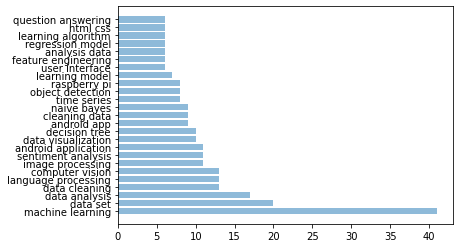

In [ ]:
top_25_NN_bigram = get_top_n_from_order_dict(NN_bigrams_frequency,25)
visualize_list_of_tuple(top_25_NN_bigram)

# Document Clustering

Cleaning each text of the corpus before clustering

In [ ]:
cleaned_documents = []
for document in documents:
    document = clean_text(document).lower()
    cleaned_documents.append(document)
documents = cleaned_documents
documents[0]

' a study to analyze steel cast limited a forging companys performance in comparison with its peers used fundamental analysis of financial statements and calculated relevant financial ratios to evaluate companys status calculated liquidity financing and performance ratios and compared with the best performer in the sector bharat forge limited'

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import time
from sklearn.cluster import KMeans


In [ ]:
class DocumentCluster:
    """Class to cluster document"""
    def __init__(self,model,data,labels):
        self.model = model
        self.data = data
        self.labels = labels
        self.model_name = self._get_model_name()
        
        self.cluster_pipeline = None
        
    
    def _get_model_name(self):
        """Get name of model being used"""
        model_name = str(self.model).split('(')[0]
        return model_name
            

    
    def train_model(self,ngram,use_idf):
        """ 
            Train model
            ngram: int
            use_idf: bool
            analyzer: string
        
        """
        current_time = time.time()
        self._ngram = ngram
        self._use_idf = use_idf
        
        # Set a pipeline
        # 1. The first step of the pipeline is to find count vectorizer
        # Countvectorizer converts a collection of text documents to a matrix of token counts
        # This implementation produces a sparse representation of the counts
        # 2. We then use TfidfTransformr
        # TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation
        # Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency

        self.cluster_pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1,ngram), 
                analyzer="word")), ('tfidf', TfidfTransformer(use_idf=use_idf)), 
                ('model', self.model)])
        self._cluster = self.cluster_pipeline.fit(self.data)
        
        self._train_time = time.time() - current_time
        
        
        print("Training completed")
        print("Training time for {} : {} secs".format(self.model_name, self._train_time))
        
    
    def predict(self):
        """
        Predict cluster id for all clusters
        """
        self.label_id_dict = {}
        self.document_id_dict = {}
        self.cluster_id = []
        for i, document in enumerate(self.data):
            cluster_id = self.cluster_pipeline.predict([document])[0]
            self.label_id_dict.update({self.labels[i]:cluster_id})
            self.document_id_dict.update({document:cluster_id})
            self.cluster_id.append(cluster_id)
        
        return self.label_id_dict, self.document_id_dict
            
    
    
        

We will create kmeans clustering model with 5 clusters

In [ ]:
cluster_number = 5

In [ ]:
model = KMeans(n_clusters=cluster_number, init = "k-means++",max_iter=150,n_init=1)

In [ ]:
doc_cluster = DocumentCluster(data=documents,model=model,labels=labels)

We will train our pipline now

In [ ]:
doc_cluster.train_model(ngram=2, use_idf=True)

Training completed
Training time for KMeans : 0.6274030208587646 secs


We will use predict method from our DocumentCluster class

In [ ]:
result_label, result_docs = doc_cluster.predict()

We can observe the cluster id of each label

In [ ]:
result_label.keys()
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
for key in result_label.keys():
    if result_label[key] == 0:
        list0.append(key)
    if result_label[key] == 1:
        list1.append(key)
    if result_label[key] == 2:
        list2.append(key)
    if result_label[key] == 3:
        list3.append(key)
    if result_label[key] == 4:
        list4.append(key)

    
        

In [ ]:
print(list0)
print(list1)
print(list2)
print(list3)
print(list4)

print(len(list0))
print(len(list1))
print(len(list2))
print(len(list3))
print(len(list4))

[11, 16, 17, 20, 39, 41, 45, 51, 66, 74, 75, 76, 77, 80, 83, 86, 100, 105, 108, 111, 113, 117, 119, 122, 127, 133, 139, 141, 148, 153, 158, 159, 169, 171, 172, 173, 174, 175, 177, 179, 181, 185, 191, 193, 200, 203, 205, 229, 231, 233, 234, 235, 236, 248, 251, 252, 254, 259, 263, 267, 275, 281, 282, 286, 287, 291, 296, 297, 299, 301, 303, 306, 308, 313, 314, 315, 317, 321, 322, 323, 324, 325, 326, 327, 329, 331, 333, 334, 335, 338, 347, 350, 352, 359, 360, 365, 368, 390, 393, 394, 408, 412, 413, 414, 417, 423, 426, 427, 431, 432, 434, 440, 445, 447, 456, 476, 483, 487, 488, 490, 492, 499, 500, 502, 507, 509, 517, 518, 524, 526, 528, 538, 539, 542, 551, 555, 565, 576, 578, 580, 589, 590, 605, 608, 610, 611, 614, 616, 617, 621, 626, 654, 657, 662, 663, 665, 668, 703]
[3, 5, 13, 15, 18, 26, 27, 28, 29, 30, 32, 34, 38, 43, 44, 46, 49, 52, 53, 56, 59, 64, 65, 67, 68, 69, 70, 79, 81, 84, 87, 88, 92, 94, 96, 99, 103, 106, 109, 115, 116, 120, 123, 125, 126, 128, 130, 131, 132, 136, 137, 140, 14

In [ ]:
documents[1]

' accounting for reasons for wastage of water in farm and conceiveing them to features developing models which could predict total cost and total returns for different types of crops fabricating and combining roles of modern machines in output of the crop with neural networks estimating weightage of amount of water on final produce with help of simple regression techniques reconciling the existing data for better visualisation on the website'

In [ ]:
corpus0 = []
for value in list0:
    if(value>702):
        break
    print(value)
    string = documents[value]
    corpus0.append(string)
    

11
16
17
20
39
41
45
51
66
74
75
76
77
80
83
86
100
105
108
111
113
117
119
122
127
133
139
141
148
153
158
159
169
171
172
173
174
175
177
179
181
185
191
193
200
203
205
229
231
233
234
235
236
248
251
252
254
259
263
267
275
281
282
286
287
291
296
297
299
301
303
306
308
313
314
315
317
321
322
323
324
325
326
327
329
331
333
334
335
338
347
350
352
359
360
365
368
390
393
394
408
412
413
414
417
423
426
427
431
432
434
440
445
447
456
476
483
487
488
490
492
499
500
502
507
509
517
518
524
526
528
538
539
542
551
555
565
576
578
580
589
590
605
608
610
611
614
616
617
621
626
654
657
662
663
665
668


In [ ]:
corpus1 = []
for value in list1:
    if(value>702):
        break
    print(value)
    string = documents[value]
    corpus1.append(string)
corpus2 = []
for value in list2:
    if(value>702):
        break
    print(value)
    string = documents[value]
    corpus2.append(string)
corpus3 = []
for value in list3:
    if(value>702):
        break
    print(value)
    string = documents[value]
    corpus3.append(string)
corpus4 = []
for value in list4:
    if(value>702):
        break
    print(value)
    string = documents[value]
    corpus4.append(string)

3
5
13
15
18
26
27
28
29
30
32
34
38
43
44
46
49
52
53
56
59
64
65
67
68
69
70
79
81
84
87
88
92
94
96
99
103
106
109
115
116
120
123
125
126
128
130
131
132
136
137
140
143
149
150
151
152
155
162
163
164
168
178
180
184
187
189
190
198
199
201
206
207
209
211
212
213
214
217
220
223
225
230
244
249
255
256
277
278
279
280
283
285
288
292
300
302
304
310
311
316
319
330
337
341
344
346
349
354
355
356
362
363
364
366
367
369
370
371
374
376
389
391
392
398
399
400
401
406
409
410
415
420
424
433
437
438
441
444
449
451
453
455
458
459
461
462
465
471
472
474
475
477
478
479
481
485
489
491
493
494
497
498
501
503
504
505
510
512
513
514
516
520
521
527
532
534
536
537
540
544
545
546
547
550
554
557
558
559
560
562
564
567
568
569
570
571
572
573
577
579
582
584
595
596
599
612
613
615
619
622
630
631
634
636
641
642
644
645
664
666
669
671
672
673
675
677
678
679
680
682
683
684
685
686
688
689
691
692
693
694
695
701
702
2
4
6
8
9
12
14
19
22
23
24
25
31
33
35
36
40
42
47
50
55
60
6

In [ ]:
len(corpus1)

244

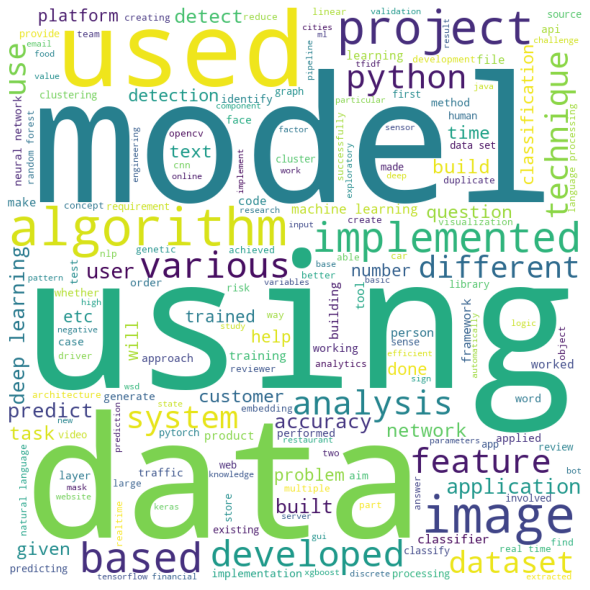

In [ ]:
cloud0 = ' '.join(corpus0)
cloud1 = ' '.join(corpus1)
cloud2 = ' '.join(corpus2)
cloud3 = ' '.join(corpus3)
cloud4 = ' '.join(corpus4)
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
# stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(cloud2) 
# plot the WordCloud image for cluster 2                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The ordered list of cluster id can be retrieved as

In [ ]:
doc_cluster.cluster_id

[4,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 4,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 4,
 1,
 2,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 4,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 4,
 1,
 4,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 0,
 4,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 4,
 1,
 1,
 0,
 1,
 4,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 4,
 4,
 4,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 4,
 4,
 0,
 0,
 3,
 2,
 1,
 1,
 1,
 2,
 4,
 2,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 4,
 2,
 1,
 0,
 4,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 4,
 4,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 4,
 1,
 2,
 3,
 3,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 3,
 2,
 3,
 2,
 3,
 4,
 3,
 1,
 2,
 4,
 2,
 0,
 1,
 2,


We will now separate text clusters into different corpus for further analysis

In [ ]:
clusters_text = []
for i in range(5):
    text = " ".join([k for k,v in result_docs.items() if v == i])
    clusters_text.append(text)

In [ ]:
clusters_text[0]

' author of a python library einsteinpy  a library for computations related to generalrelativity and geodesic equations solving odes visualisations etc project to be a part of google summer of code gsoc  under openastronomyumbrella along with standalone organisation in esa socis  set up cicd test automation and documentation forthe project the codebase is being used in a research in university of toronto and cern forstudying the negative matter effect on gravitational lensing project sponsored by python software foundation numfocus and esa  built a team of autonomous humanoid agents capable of playing soccer intelligently in a simulatedenvironment following physics and the rule of soccer optimized lowlevel skills like walking kicking by a factor of x using evolutionary strategiescmaes developed firstever simspark based humanoid gym openai environment and implemented rlalgorithms such as trpo and ddpg to optimize lowlevel skills developed passing dodging defense and implemented position

Analysing bigrams of all the clusters

We will be taking only top 25 bigram of all clusters

In [ ]:
def get_cluster_analysis_results(clusters_text):
    all_clusters = {}

    for i, corpus in enumerate(clusters_text):
        tokens = corpus.split()
        # Using words token generated from spacy to find bigram
        bigram_list = create_bigram(tokens)
        bigrams = [" ".join(bigram) for bigram in list(bigram_list)]
        bigram_frequency = sort_by_frequency(bigrams)
        top_bigrams = get_top_n_from_order_dict(bigram_frequency,25)

        # Finding bigrams with Both words Nouns
        NN_bigrams = get_noun_noun_bigram(bigram_list)
        NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
        top_NN_bigrams = get_top_n_from_order_dict(NN_bigrams_frequency,25)

        # Finding bigram starting with verb
        V_bigrams = get_bigram_starting_with_verb(bigram_list)
        V_bigrams_frequency = sort_by_frequency(V_bigrams)
        top_V_bigrams = get_top_n_from_order_dict(V_bigrams_frequency,25)


        # Finding bigram starting with person name
        people_bigrams = get_bigram_starting_with_person(bigram_list)
        people_bigrams_frequency = sort_by_frequency(people_bigrams)
        top_people_bigrams = get_top_n_from_order_dict(people_bigrams_frequency,25)

        # Finding 
        org_bigrams = get_bigram_starting_with_organization(bigram_list)
        org_bigrams_frequency = sort_by_frequency(org_bigrams)
        top_org_bigrams = get_top_n_from_order_dict(org_bigrams_frequency,25)


        cluster_analysis_result = {"bigram_freq":top_bigrams,"noun_noun_bigram":top_NN_bigrams,
                                       "verb_bigram":top_V_bigrams, "people_bigram": top_people_bigrams,
                                       "organization_bigram":top_org_bigrams}
        all_clusters.update({i:cluster_analysis_result})
    
    return all_clusters

all_clusters = get_cluster_analysis_results(clusters_text=clusters_text)

IndexError: ignored

We can access the analysis result in following way

In [ ]:
cluster_id = 0
all_clusters[cluster_id]

We can now compare different bigrams of these clusters

In [ ]:
def compare_bigram_of_clusters(comparision_parameter):
    """ 
    Function which creates dataframe for given parameter for all clusters
    Helpful for comparitive study
    """
    cluster_data = {}
    for cluster_id in range(cluster_number):
        cluster_result = all_clusters[cluster_id]
        data = cluster_result[comparision_parameter]
        bigram, frequency = zip(*data)
        col1 = "bigram_cluster_" + str(cluster_id)
        col2 = "bigram_freq_cluster_" + str(cluster_id)
        cluster_data.update({col1:bigram, col2: frequency})
    return pd.DataFrame(data=cluster_data)


In [ ]:
df = compare_bigram_of_clusters("bigram_freq")
df

From the table we can observe that the most frequent bigram for all the clusters are made of stop words like in, the, of , to etc. Cluster-0 seems to have document related to syria, and topics related to syria like presient bashar, human rights etc. Similarly cluster-3 seems to have documents related to election. Cluster-2 contain document related to isrel and palestine. While from top bigrams Cluster-1 and 4 seems to be vague.

In [ ]:
# saving the dataframe as csv file
df.to_csv("./result/bigram_frequency.csv")

Similarly we can analyse data for other parameters too 


In [ ]:
df = compare_bigram_of_clusters("noun_noun_bigram")
df

From the comparision of noun noun bigram, the type of documents clustered by the algorithms is more clear now. Cluster-1 seems to be about terrorism while cluster-4 seems to be about USA and its activities. 

In [ ]:
# saving the dataframe as csv file
df.to_csv("./result/noun_noun_bigram.csv")

We will save the reslts for other parameters too

In [ ]:
df = compare_bigram_of_clusters("verb_bigram")
df.to_csv("./result/verb_bigram.csv")

In [ ]:
df = compare_bigram_of_clusters("people_bigram")
df.to_csv("./result/people_bigram.csv")

In [ ]:
df = compare_bigram_of_clusters("organization_bigram")
df.to_csv("./result/organization_bigram.csv")